In [519]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pb
from math import pi
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import math
from scipy.stats import norm

In [520]:

normal = norm(0,1)
t = -2
x = -1
size = 1000
w0_range = np.linspace(-2, 2, size)
w1_range = np.linspace(-2, 2, size)


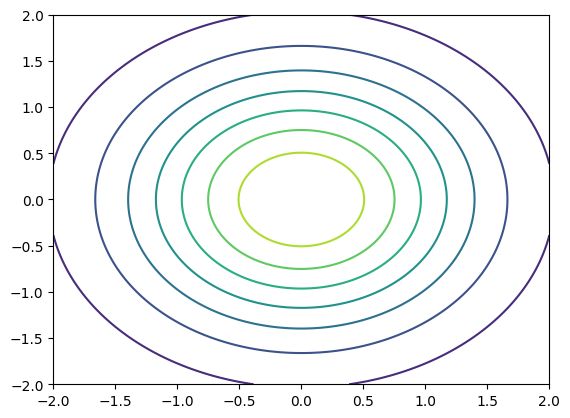

In [521]:

W0, W1 = np.meshgrid(w0_range, w1_range)

#print(np.shape(W0))
#print(W0)
#print(W1)

def likelihood(t, x, W0, W1):
    return np.exp(-0.5 *((t - W0*x - W1)/0.2)**2)/(math.sqrt(2*pi)*0.2)
    
    

prior = normal.pdf(W0) * normal.pdf(W1)
plt.figure()
plt.contour(W0, W1, prior)
##plt.scatter(normal.pdf(W0), normal.pdf(W1))

plt.show()



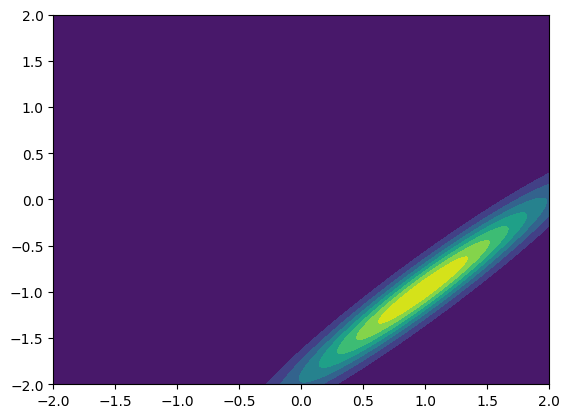

In [522]:
### task 1.2 ####
posterior = likelihood(t, x, W0, W1) * prior

plt.figure()
plt.contourf(W0, W1, posterior)

plt.show()

[1 1]
[[ 1.   -1.  ]
 [ 1.   -0.99]
 [ 1.   -0.98]
 [ 1.    1.  ]
 [ 1.    0.99]
 [ 1.    0.  ]
 [ 1.    0.75]]
2
[[-2.55452608  2.45974135]
 [-0.86352143  1.77940982]
 [-2.18781575  2.45231443]
 [-1.94817589  1.91996316]
 [-1.28526622  1.23017608]]


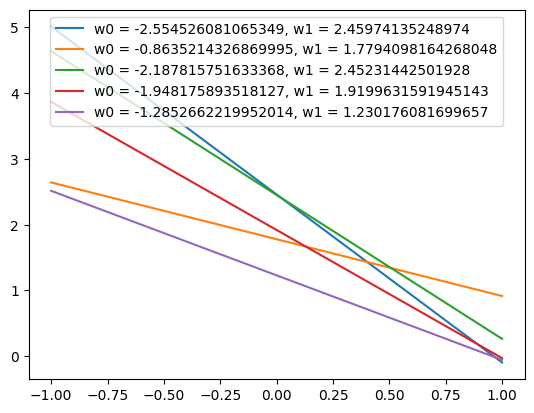

In [523]:
### task 1.3 ####
alpha = 1 / 0.2
beta = 0.2
data_t = [-2, -1.995, -1.99, -1, -1.005, -1.5, -1.125]
data_x = [-1, -0.99, -0.98, 1, 0.99, 0, 0.75]

print([1, -1]*np.transpose([1, -1]))

x_vec = data_x
t_vec = data_t
ones = np.ones(len(x_vec))
np.transpose([ones, x_vec]), [ones, x_vec]
#print(np.matmul([ones, x_vec],np.transpose([ones, x_vec])))

print(np.transpose([ones, x_vec]))
# print(np.matmul(np.transpose([ones, x_vec]), t_vec))

def create_samples(t_vec, x_vec, samples):
    ones = np.ones(len(x_vec))
    S = np.identity(2)*alpha + beta*np.matmul([ones, x_vec], np.transpose([ones, x_vec]))
    M = beta*S*np.matmul(np.transpose([ones, x_vec]), t_vec)
    return np.random.multivariate_normal(M, S, samples)

x_vec = data_x
t_vec = data_t
print(np.matmul(np.transpose([1, -1]), [1,-1]))
ones = np.ones(len(x_vec))
S = np.identity(2)*alpha + beta * np.matmul(np.transpose([1, -1]), [1,-1])
M = beta*np.matmul(S,np.transpose([1, -1]))*-2


#samples = create_samples(data_t, data_x, 5)
samples = np.random.multivariate_normal(M, np.linalg.inv(S), 5)
print(samples)

w0 = []
w1 = []
for i in samples:
    w0.append(i[0])
    w1.append(i[1])


x_axis = np.linspace(-1,1, 200)

y = []
plt.figure()
for i in range(5): 
    y = w0[i]*x_axis + w1[i]
    plt.plot(x_axis, y, label= f"w0 = {w0[i]}, w1 = {w1[i]}")


plt.legend(loc='upper center')
plt.show()



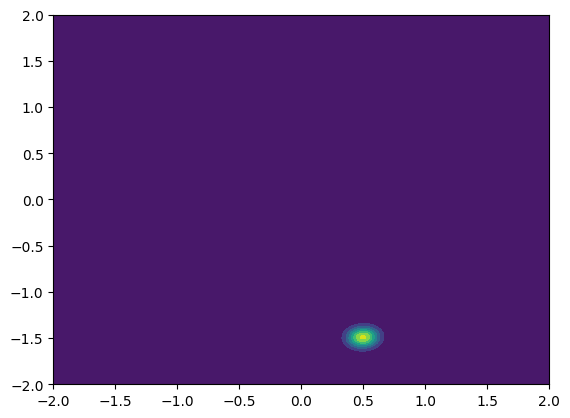

In [524]:
## task 1.4 ###
data_t = [-2, -1.995, -1.99, -1, -1.005, -1.5, -1.125]
data_x = [-1, -0.99, -0.98, 1, 0.99, 0, 0.75]


def calc_posterior(data_t, data_x, w0, w1, prior, length):
    posterior = likelihood(data_t[0], data_x[0], w0, w1) * prior
    for i in range(length):
        if i > 0:
            posterior *= likelihood(data_t[i], data_x[i], w0, w1)
    return posterior


new_posterior = calc_posterior(data_t, data_x, W0, W1, prior, 7)

plt.contourf(W0, W1, new_posterior)
plt.show()

Task 2

In [550]:
#####task 2.1 #####
sigma = 0.2
size = 800
x0 = np.ones(40)
x1 = np.linspace(-1, 1, 40)
x2 = np.linspace(-1, 1, 40)

#x0_data = np.linspace(-1,1,1000)
#x1_data = np.linspace(-1,1,1000)

#    w0  w1   w2
W = [0, 1.5, -0.8] 


w0_range = np.linspace(-2, 2, 40)
w1_range = np.linspace(-2, 2, 40)
w2_range = np.linspace(-2, 2, 40)

W0, W1, W2= np.meshgrid(w0_range, w1_range, w2_range)
normal = norm(0, 1/sigma)

st_normal = norm(0, 1)
prior = st_normal.pdf(W0) * st_normal.pdf(W1) * st_normal.pdf(W2)

In [551]:
## Data generation etc.
def generate_data(x1, x2, W, sigma):
    w0 = W[0]
    w1 = W[1]
    w2 = W[2]
    return w0 + w1*x1 + w2*(x2**2) + np.random.normal(0,sigma)

data = generate_data(x1, x2, W, sigma)

data_vec = np.array(data)

print(np.shape(data_vec))



(40,)


In [552]:
#######task 2.2#############

def extract_data(data_vec):
    training_vec = []
    
    for i in range(len(data_vec)):
        if(0 <= i <=13 or 26 <= i <=39 ): 
            training_vec.append(data_vec[i])
            
    return training_vec
            


def extract_x_domain(x_vec):
    domain = []
    for i in range(len(x_vec)):
        if(0 <= i <=13 or 26 <= i <=39 ): 
            domain.append(x_vec[i])
    return domain

print(extract_data(data_vec))
print(extract_x_domain(x1))


[-2.325030385204979, -2.1681599052575757, -2.015497183364085, -1.8670422195245058, -1.7227950137388386, -1.5827555660070831, -1.4469238763292394, -1.3152999447053078, -1.187883771135288, -1.0646753556191806, -0.9456746981569846, -0.8308817987487003, -0.7202966573943281, -0.6139192740938679, 0.38608072590613196, 0.4335494964518256, 0.4768105089436074, 0.5158637633814771, 0.550709259765435, 0.5813469980954811, 0.6077769783716152, 0.6299992005938373, 0.6480136647621477, 0.6618203708765462, 0.6714193189370328, 0.6768105089436074, 0.6779939408962699, 0.6749696147950208]
[-1.0, -0.9487179487179487, -0.8974358974358975, -0.8461538461538461, -0.7948717948717949, -0.7435897435897436, -0.6923076923076923, -0.641025641025641, -0.5897435897435898, -0.5384615384615385, -0.4871794871794872, -0.4358974358974359, -0.3846153846153846, -0.33333333333333337, 0.33333333333333326, 0.3846153846153846, 0.4358974358974359, 0.4871794871794872, 0.5384615384615383, 0.5897435897435896, 0.641025641025641, 0.692307

In [553]:
## Maximum likelihood approach


data_vec = [data]
training_size = size
training_data = extract_data(data_vec)
training_x0 = extract_x_domain(x0)
training_x1 = extract_x_domain(x1)
training_x2 = extract_x_domain(x2)

phi = np.transpose([x0, x1, x2**2])

## Gamla phi_t 
# phi_t = np.transpose([ones, data, data**2])

phi_t = np.matmul([x0, x1, x2**2], np.transpose(training_data))
inv_phiTphi = np.linalg.inv(np.matmul(np.transpose(phi), phi))
W_ml = np.matmul(inv_phiTphi, phi_t)

#phi_t

#print((np.matmul(np.transpose(phi), phi)))

def calc_beta_inv(W_ml, x0, x1, x2, training_data):
    w0 = W_ml[0]
    w1 = W_ml[1]
    w2 = W_ml[2]
    res_vec = 0

    for i in range(len(training_data)):
        
        res_vec += (training_data[i] - w0*x0[i] + w1*x1[i] + w2*(x2[i]**2))**2
        
    return res_vec/len(training_data)


print(W_ml)
print(1 / calc_beta_inv(W_ml, x0, x1, x2, training_data))



#beta_inv = (training_data - np.matmul(np.transpose(W_ml), ))

#print(np.shape(W_ml))


[[-0.02503039]
 [ 1.5       ]
 [-0.8       ]]
[0.04725898 0.05065497 0.0543239  0.05828776 0.06256991 0.06719507
 0.07218918 0.07757931 0.08339342 0.08966014 0.09640831 0.10366655
 0.11146259 0.11982249 0.12876966 0.13832375 0.14849922 0.15930379
 0.17073666 0.18278653 0.19542947 0.20862673 0.22232257 0.23644217
 0.25088994 0.26554824 0.28027682 0.29491321 0.30927425 0.32315885
 0.33635223 0.34863157 0.35977289 0.36955903 0.37778822 0.38428276
 0.38889721 0.39152543 0.39210592 0.390625  ]


In [554]:
## Bayesian linear regression approach
alpha = 1/0.2
beta = 0.2


S = alpha*np.identity(3) + beta*np.matmul(np.transpose(phi), phi) 
S_x_phi = np.matmul(S, np.transpose(phi))
print(S)

mean = np.matmul(S_x_phi, np.transpose(training_data)) 

print(mean)


[[ 1.30000000e+01 -4.88498131e-16  2.80341880e+00]
 [-4.88498131e-16  7.80341880e+00 -4.44089210e-17]
 [ 2.80341880e+00 -4.44089210e-17  6.76683581e+00]]
[[-179.58988963]
 [ 164.07188253]
 [ -84.44117174]]


In [558]:
W0, W1, W2 = np.meshgrid(w0_range, w1_range, w2_range)

st_normal = norm(0, 1)
prior = st_normal.pdf(W0) * st_normal.pdf(W1) * st_normal.pdf(W2)


def likelihood(training_data, W, x0, x1, x2):
    w0 = W[0]
    w1 = W[1]
    w2 = W[2]
    return np.exp(-0.5 *((training_data - w0*x0 + w1*x1 + w2*(x2**2))/sigma)**2)/(math.sqrt(2*pi)*sigma)


#posterior = [likelihood(training_data, W, x0, x1)] * prior


def calc_posterior(training_data, training_x0, training_x1, training_x2, W, prior):

    posterior = likelihood(training_data, W, x0, x1, x2) * prior
    prior = posterior
    for i in range(len(training_data)):
        posterior = likelihood(training_data[i], W, training_x0[i], training_x1[i], training_x2[i]) * prior
        prior = posterior
    return posterior

w_best = [np.max(posterior[:,0]), np.max(posterior[:,1]), np.max(posterior[:,2])]
print(w_best)

alpha = 1/sigma
beta = sigma

def create_samples_multi(data_vec, x0, x1, samples):
    ones = np.ones(len(x0))
    S = np.identity(3)*alpha + beta*np.matmul([ones, training_x0, training_x1**2], np.transpose([ones, training_x0, training_x1**2]))
    M = beta*np.matmul(S, np.matmul([ones, training_x0, training_x1**2], np.transpose(data_vec)))
    M = np.squeeze(M)
    return np.random.multivariate_normal(M, S, samples)


ones = np.ones(len(x0))
samples = 5
## print(create_samples_multi(data_vec, x0, x1, samples))
## print(calc_posterior(training_data, training_x0, training_x1, training_x2, W, prior))

## ## Plotting

#fig =




 #plt



[1.1214971622710782e-24, 1.3808017880177527e-24, 1.6993524973475445e-24]
